# URL of the data

In [1]:
url = 'https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/epilepsy.data'

In [2]:
## converting the url to raw url for reading
url = url.replace('github.com','raw.githubusercontent.com').replace('/blob/','/')

# Importing important libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [4]:
## reading the csv file from url
df1=pd.read_csv(url)

In [5]:
## viewing the data
df1

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
## checking info of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
## looking for null values
df1.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### we can clearly see that there are null values present in MDVP:PPQ Jitter:DDP so we will fill it with the mean values

In [8]:
## replacing missing value with mean value
df1['MDVP:PPQ'].fillna(df1['MDVP:PPQ'].mean(),inplace=True)
df1['Jitter:DDP'].fillna(df1['Jitter:DDP'].mean(),inplace=True)

In [9]:
## again checking for null values
df1.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
## checking the count of people who have epilepsy to who dont have
df1.status.value_counts()

1    147
0     48
Name: status, dtype: int64

# Visualization

<AxesSubplot:xlabel='status', ylabel='count'>

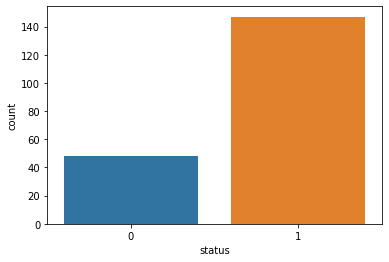

In [11]:
sns.countplot(x=df1['status'])

# Scaling

In [12]:
## we need to scale the data we will use StandardScaler()
scale=StandardScaler()

In [13]:
## seperating target column before scaling
target=df1['status']

In [14]:
## droping the name and status column
df1.drop(['name','status'],axis=1,inplace=True)

In [15]:
## Fitting the data to scaler
scale.fit(df1)

StandardScaler()

In [16]:
## Transforming the data to scaled
new_df1 = scale.transform(df1)

In [17]:
## defining new dataframe with scaled values
df1_new = pd.DataFrame(new_df1,columns=scale.feature_names_in_)

In [18]:
df1_new

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.755221,0.130376,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.272751,0.451365,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.582540,0.720546,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.280040,0.576383,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.045401,1.095598,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.319930,-0.228908,0.593395,0.631498,...,0.199282,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.199659,0.000853,-0.116922,-0.099041,...,-0.313046,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929
192,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.791667,0.990854,-0.352453,-0.135053,...,-0.438466,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.157510,0.130376,-0.358834,-0.212223,...,-0.485202,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105


In [19]:
## adding the target column for feature scaling purpose
df1_new['status']=target

In [20]:
df1_new

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.755221,0.130376,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.272751,0.451365,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.582540,0.720546,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.280040,0.576383,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.045401,1.095598,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.319930,-0.228908,0.593395,0.631498,...,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703,0
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.199659,0.000853,-0.116922,-0.099041,...,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929,0
192,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.791667,0.990854,-0.352453,-0.135053,...,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410,0
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.157510,0.130376,-0.358834,-0.212223,...,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105,0


In [21]:
## statistics of the dataset
df1_new.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,195.000000
mean,3.529940e-17,-2.237526e-16,1.309494e-16,-3.586874e-17,1.024821e-16,-1.182103e-16,-5.081405e-17,9.145106e-17,2.493732e-16,-1.374969e-16,...,-1.673875e-16,3.586874e-17,8.770762e-16,-1.747890e-16,6.422213e-16,1.161678e-15,-1.246866e-16,-6.066372e-16,-2.163512e-17,0.753846
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,...,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,0.431878
min,-1.596162e+00,-1.040581e+00,-1.171366e+00,-9.389487e-01,-1.064103e+00,-8.872543e-01,-9.285743e-01,-8.889078e-01,-1.072340e+00,-1.014787e+00,...,-1.097815e+00,-6.002051e-01,-3.045707e+00,-2.333888e+00,-2.605676e+00,-2.097268e+00,-2.647338e+00,-2.510472e+00,-1.802384e+00,0.000000
25%,-8.879183e-01,-6.820590e-01,-7.379376e-01,-5.708520e-01,-6.898141e-01,-5.561906e-01,-5.750502e-01,-5.572184e-01,-7.020291e-01,-6.881025e-01,...,-7.326182e-01,-4.693595e-01,-6.089102e-01,-7.449206e-01,-7.852617e-01,-7.041503e-01,-6.269844e-01,-7.404100e-01,-7.687420e-01,1.000000
50%,-1.317379e-01,-2.331437e-01,-2.766579e-01,-2.647942e-01,-4.018994e-01,-2.724216e-01,-2.616165e-01,-2.750852e-01,-3.583019e-01,-3.151160e-01,...,-2.841460e-01,-3.271036e-01,4.508553e-02,-2.490033e-02,7.527941e-02,-3.353960e-02,-9.166005e-02,-5.315145e-02,-1.390580e-01,1.000000
75%,6.913210e-01,2.969710e-01,5.458200e-01,2.366858e-01,4.618447e-01,1.785683e-01,1.775552e-01,1.771163e-01,4.346898e-01,3.485429e-01,...,4.543110e-01,1.966835e-02,7.225273e-01,8.587132e-01,7.932500e-01,5.869042e-01,6.337615e-01,6.668912e-01,5.165137e-01,1.000000
max,2.564598e+00,4.327631e+00,2.829908e+00,5.570985e+00,6.220139e+00,6.125892e+00,5.872208e+00,6.126691e+00,4.751617e+00,5.246243e+00,...,4.029746e+00,7.192738e+00,2.528321e+00,1.800007e+00,1.942048e+00,2.989093e+00,2.692370e+00,3.376831e+00,3.569059e+00,1.000000


# Feature selection

## Heatmap

<AxesSubplot:>

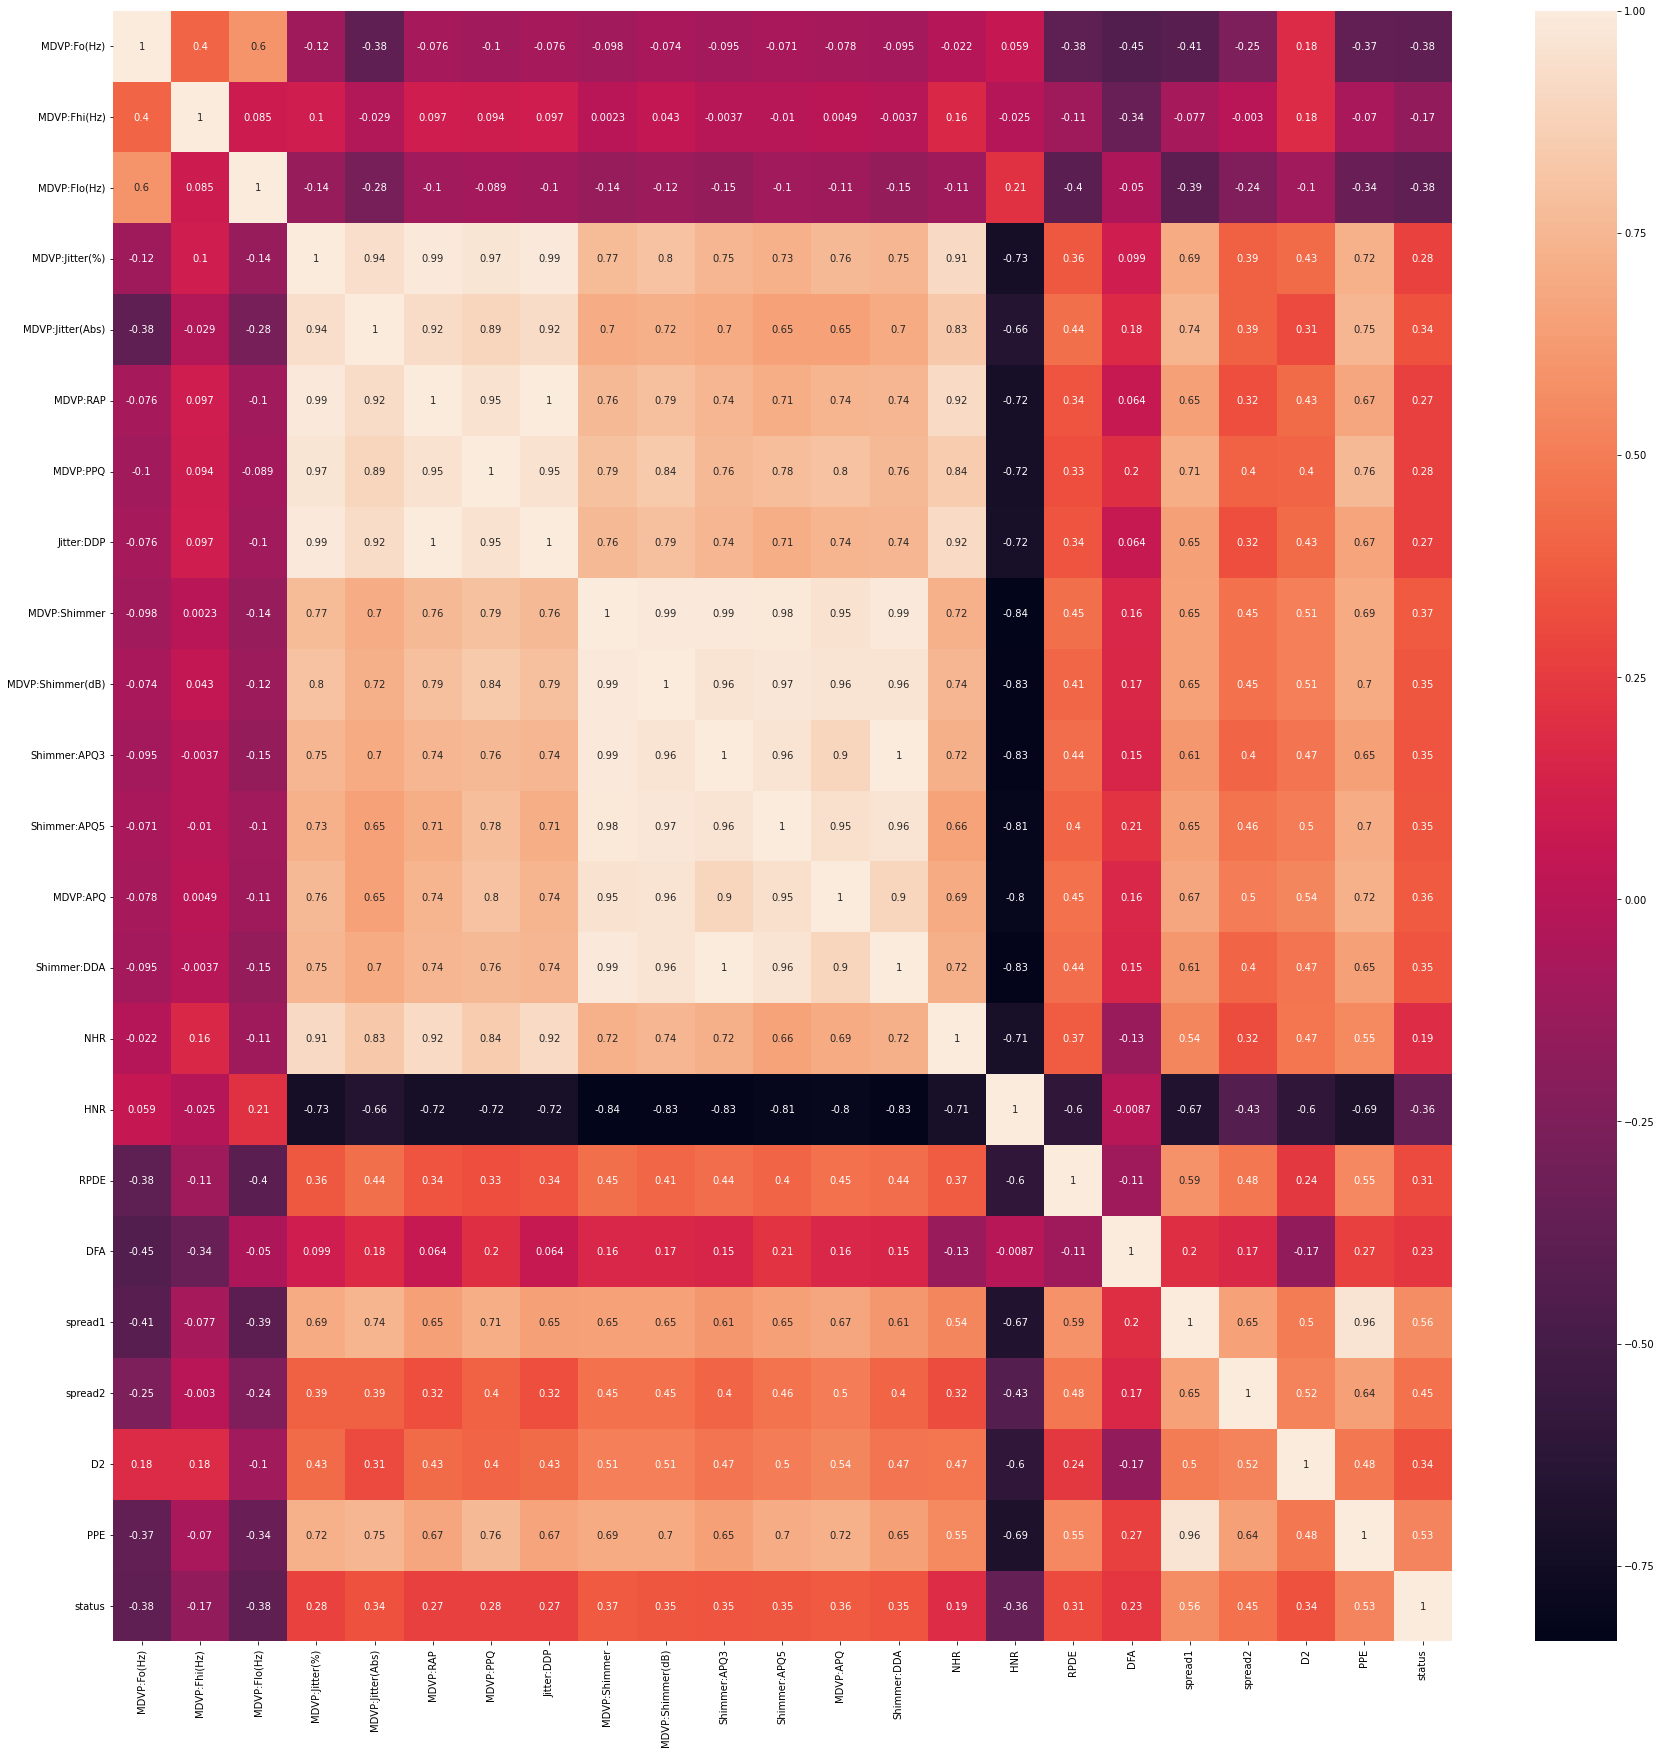

In [22]:
## checking co-relation in heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(df1_new.corr(),annot=True)

### corelation is almost the same for all features so we need to cosider all features

In [23]:
## splitting the data into dependent and independent variable
X=df1_new.drop(['status'],axis=1)
y=df1_new['status']

In [24]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.755221,0.130376,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.272751,0.451365,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.582540,0.720546,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.280040,0.576383,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.045401,1.095598,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

# Modeling

In [26]:
## Splitting the data set into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

## Decision Tree Classifier

In [27]:
dc=DecisionTreeClassifier(criterion="entropy",splitter="random")

In [28]:
## fitting data
dc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [29]:
## prediction
y_pred=dc.predict(X_test)

In [30]:
## to get scores
print('Scores : ')
print(' ')
print('Train:  ',dc.score(X_train,y_train))
print('Test:  ',dc.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,y_pred))

Scores : 
 
Train:   1.0
Test:   0.9183673469387755
Accuracy:   0.9183673469387755


In [31]:
## using Confusion matrix for test data
cm = confusion_matrix(y_test,y_pred)

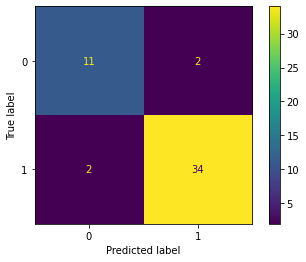

In [32]:
ConfusionMatrixDisplay(cm).plot()

# Logistic Regression

In [33]:
lr=LogisticRegression()

In [34]:
## fitting data
lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
## prediction
y_pred1=lr.predict(X_test)

In [36]:
## to get scores
print('Scores : ')
print(' ')
print('Train:  ',lr.score(X_train,y_train))
print('Test:  ',lr.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,y_pred1))

Scores : 
 
Train:   0.8835616438356164
Test:   0.8367346938775511
Accuracy:   0.8367346938775511


In [37]:
## using Confusion matrix for test data
cm1 = confusion_matrix(y_test,y_pred1)

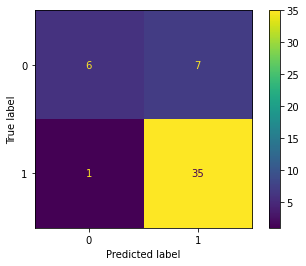

In [38]:
ConfusionMatrixDisplay(cm1).plot()

# Bagging Classifier

In [39]:
bg=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)

In [40]:
## fitting data
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [41]:
## prediction
y_pred2=bg.predict(X_test)

In [42]:
## to getscores
print('Scores : ')
print(' ')
print('Train:  ',bg.score(X_train,y_train))
print('Test:  ',bg.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,y_pred2))

Scores : 
 
Train:   1.0
Test:   0.9183673469387755
Accuracy:   0.9183673469387755


In [43]:
## using Confusion matrix for test data
cm2 = confusion_matrix(y_test,y_pred2)

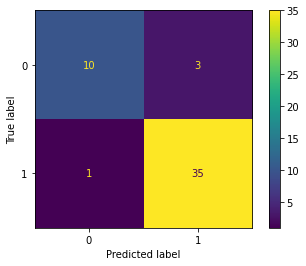

In [44]:
ConfusionMatrixDisplay(cm2).plot()

# SVM

In [45]:
sv=SVC(C=5)

In [46]:
## fitting data
sv.fit(X_train,y_train)

SVC(C=5)

In [47]:
## prediction
y_pred3=sv.predict(X_test)

In [48]:
## to get scores
print('Scores : ')
print(' ')
print('Train:  ',sv.score(X_train,y_train))
print('Test:  ',sv.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,y_pred3))

Scores : 
 
Train:   0.9246575342465754
Test:   0.8571428571428571
Accuracy:   0.8571428571428571


In [49]:
## using Confusion matrix for test data
cm3 = confusion_matrix(y_test,y_pred3)

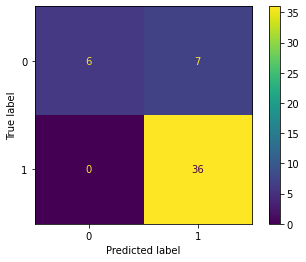

In [50]:
ConfusionMatrixDisplay(cm3).plot()